<a href="https://colab.research.google.com/github/kwon0915/Kwon-Hyeong-Joong/blob/master/indian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pregnancies: 임신 횟수
# Glucose: 포도당 부하 검사 수치
# BloodPressure: 혈압(mm Hg)
# SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
# Insulin: 혈청 인슐린(mu U/ml)
# BMI: 체질량지수 (체중(kg) / 키(m)^2)
# DiabetesPedigreeFunction: 당뇨 내력 가중치 값
# Age: 나이
# Outcome: 클래스 결정 값 (0 또는 1)(타겟)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sklearn : 분류
from sklearn.ensemble import RandomForestClassifier
# metrics : 평가
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score,precision_score,recall_score, roc_curve, classification_report,precision_recall_curve
# preprocessing : 전처리
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, Binarizer, OneHotEncoder, LabelEncoder
# train_test_split, GridSearchCV : 7:3 데이터 나누기
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
df = pd.read_csv("diabetes.xls")

In [ ]:
print(df.shape) 

(768, 9)


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(df["Outcome"].value_counts()) #정상과 그렇지 않은 사람들의 비율 (0 : 500, 1 : 268), 정상이 2명이면 당뇨 한명 정도

0    500
1    268
Name: Outcome, dtype: int64


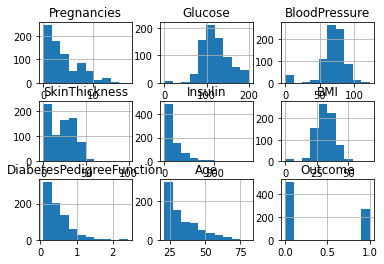

In [ ]:
df.hist()#히스토그램(제일 간단하게 그릴수 있는 차트), 아웃라이어와 이상치(0) 값이 그래프에 보임
plt.show() # Pregnancies: 임신 횟수 (안했다고 해서 편중이 아님), # Glucose: 포도당 부하 검사 수치(0인 경우 이상치, 아웃라이어)
# BloodPressure: 혈압(mm Hg)(0인 경우 이상치, 아웃라이어), # Insulin: 혈청 인슐린(mu U/ml)(0인 경우 이상치, 아웃라이어)
# BMI: 체질량지수 (체중(kg) / 키(m)^2), # DiabetesPedigreeFunction: 당뇨 내력 가중치 값(유전도가 0일수는 있음)
# Age: 나이(구간화 시켜야함), # Outcome: 클래스 결정 값 (0 또는 1)(타겟)

In [ ]:
#데이터를 살펴보았을 떄 필요한 작업
# 1. 이상치 발견(0값)
# 2. 나이(구간화)
# 3. 정규화(스케일링/아웃라이어 중 고민)
# 4. 타겟 : Outcome(0/1)

In [ ]:
y = df["Outcome"] #타겟데이터 꺼내기
X = df.drop("Outcome", axis=1) #잘라낸것을 X에 대입
print(X.shape, y.shape)#잘 잘라냈는지 확인, (768, 8) (768,)

(768, 8) (768,)


In [ ]:
#--- 분석이 용이하려면: 결측치가 없어야 함(isnull().dropna().fillna())
#--- 분석이 용이하려면: object가 없어야 함(oh.Encoding() : 010 ,001, 100 식으로 바꾸어줌, pd.getDummy() : 결측처리+ 인코딩(인코딩은 글자를 수치로 바꾸는 것)
#--- 상관분석(분석의 시작)

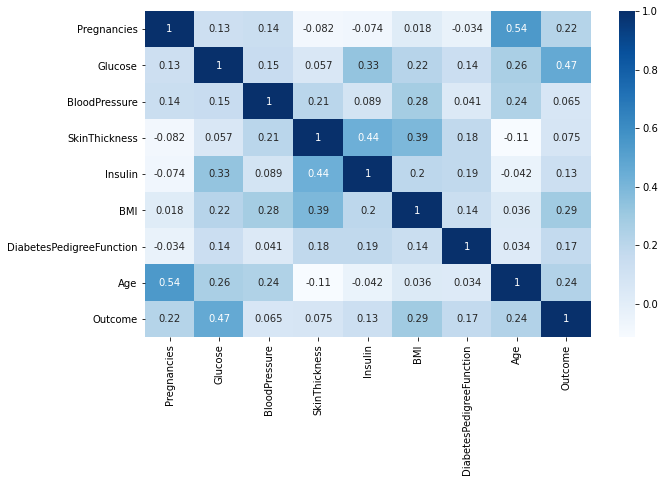

In [ ]:
plt.figure(figsize=(10,6)) #표 사이즈 조절, 피쳐간의 상관분석
sns.heatmap(df.corr(), annot=True, fmt=".2g", cmap="Blues") #corr: 상관분석, annot=True : 수치값 보여줘, fmt=".2g" : 소숫점자리, cmap="Blues" : 색
plt.show()
#당뇨에 영향을 미치는 것은 포도당, 포도당에 영향을 미치는 것은 인슐린 (연속적 관계 확인)
#outcome(당뇨)에 Glucose(포도당 부하 검사 수치), BMI, Age, Pregnancies 순으로 중요함
#Glucose(: 포도당 부하 검사 수치 )를 기준으로 영향을 가장 많이 주는것은 Insulin, Age
#Age 에 영향을 많이 미치는 것은 Pregnancies(임신 횟수), Glucose(포도당 부하 검사 수치)
#BMI 에 영향을 미치는 것은 SkinThickness(팔 삼두근 뒤쪽의 피하지방 측정값(mm))
# DiabetesPedigreeFunction: 당뇨 내력 가중치 값(유전) 은 큰 관계가 있다고 보기 힘듬

In [ ]:
#아래 내용 메서드화
def GET_MY_SCORE(y_test, pred, str=None) :
    print("------{}-------".format(str))
    acc = accuracy_score(y_test, pred)  # 내 답안과 컴퓨터가 낸 답안을 비교
    f1 = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)  # 재현률
    rocauc = roc_auc_score(y_test, pred)
    # print("정확도:", acc, "f1:", f1)
    print("정확도{:.4f}  F1 {:.4f}=(정밀도{:.4f}  재현률{:.4f}) rocauc{:.4f}".format(acc, f1, precision, recall, rocauc))  # 위와 같은 방식이나 조금 더 편리, format() 내에는 변수를 기입
    # {:.4f} : 소숫점 4자리만 표시해줘
    cf_matrix = confusion_matrix(y_test, pred)
    print(cf_matrix)


In [ ]:
#전처리 전의 점수(전처리 후의 점수와 비교하기 위함)
X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121) #random_state=121 : 헷갈리면 안되기에 아무 수치나
#문제 문제 8:2, 답안 답안 8:2
rf_model = RandomForestClassifier() #모델을 다른것 사용하려면 이 한 줄만 바꾸면 됨
rf_model.fit(X_train, y_train)#fit: 해당 모델을 이용해서 학습해라, 완료시 return데이터는 없음, X_train, y_train : 문제와 답안
pred = rf_model.predict(X_test) #X_test 시험지를 주고 맞추라는 의미
GET_MY_SCORE(y_test, pred, "최초점수") #확인했으나 그닥 마음에 드는 점수가 아님

------최초점수-------
정확도0.8312  F1 0.7400=(정밀도0.8043  재현률0.6852) rocauc0.7976
[[91  9]
 [17 37]]


In [ ]:
#-----------------------------------------
# 아웃라이어/특이값 : 0값 처리, 조금 벗어나면 특이값, 많이 벗어나면 outlier
# 1.row삭제 2.채우기(평균, 최빈도, 중위값, 0, null) 3.예측해서 채우기
#-----------------------------------------

In [ ]:
#피쳐데이터에서 0인 것들을 찾음
# gn = X["Glucose"].nonzero()#포도당 수치 확인, 실행안됨
#print(X.columns) #컬럼 확인
#cols = X.columns
for col in X.columns :  #컬럼에서 하나씩 뺴서 col에 넣어라
    gcnt = X[col][X[col]==0].count()# 0인 것들 가져와서 확인
    print(col, gcnt,  np.round(gcnt/X.shape[0]*100, 2)) #5명, 전체 비율을 gcnt/X.shape[0]*100 을 통해서 확인

# Glucose 5 0.65 #포도당이 0일리가 없기에 이상함
# BloodPressure 35 4.56 #혈압도 0인 것이 이상함
# SkinThickness 227 29.56 #227명이 0
# Insulin 374 48.7 #374가 0
# BMI 11 1.43 #키가 있는데 0 값이 있음
# DiabetesPedigreeFunction 0 0.0
# Age 0 0.0 #나이가 0인 애들은 없음

Pregnancies 111 14.45
Glucose 5 0.65
BloodPressure 35 4.56
SkinThickness 227 29.56
Insulin 374 48.7
BMI 11 1.43
DiabetesPedigreeFunction 0 0.0
Age 0 0.0


In [ ]:
#중위값 채우기
zero_column = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"] #제로컬럼 나열(문제가 되는 피처들)
print(X[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].describe()) #Insulin은 mean(79.8) 에 비해 std(편차 115.2)가 많이 떨어져있음
#Insulin의 max값을 보았을 때 편차가 지나치게 커서 평균보다는 중위값이 적당

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   120.894531      69.105469      20.536458   79.799479   31.992578
std     31.972618      19.355807      15.952218  115.244002    7.884160
min      0.000000       0.000000       0.000000    0.000000    0.000000
25%     99.000000      62.000000       0.000000    0.000000   27.300000
50%    117.000000      72.000000      23.000000   30.500000   32.000000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


In [ ]:
zero_column_mean = X[zero_column].median().round(1) #제로컬럼에 해당하는 각각의 중위값을 담음
X[zero_column] = X[zero_column].replace(0, zero_column_mean) #replace : 어떠한 값으로 바꾸어줄지를 설정 , 0인 애들을 중위값으로 채움

In [ ]:
X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
#rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
GET_MY_SCORE(y_test, pred, "아웃라이어/특이값(0) 처리 후 점수") #점수 찍어보기

------아웃라이어/특이값(0) 처리 후 점수-------
정확도0.8377  F1 0.7368=(정밀도0.8537  재현률0.6481) rocauc0.7941
[[94  6]
 [19 35]]


In [ ]:
#-----------------------------------------
#나이 구간화 / 인코딩 25~75세
#-----------------------------------------
X["Age_cate"] = X["Age"].apply(lambda x : int(x//10))#해당하는 나이는 나이 구간으로 집어넣음, 몫으로 가지고 옴
X = pd.get_dummies(data=X , columns=["Age_cate"], prefix = "OH_Age_cate") #drop.first=True : 원본을 지워버림
print(X.info())
# print(X[["Age_cate","Age"]].head())  #인코딩 후 Age_cate는 자동 삭제   --- drop_first=False 동작X

X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
#print(X[["Age_cate", "Age"]].head()) #에러 발생 , OH_Age_cate_2  부터 시작하는 이유는 20대 부터 시작, 인코딩 후 Age_cate는 자동 삭제-->drop_first=False 동작x
GET_MY_SCORE(y_test, pred, "Age 인코딩/범주화 후 점수") #점수 찍어보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   OH_Age_cate_2             768 non-null    uint8  
 9   OH_Age_cate_3             768 non-null    uint8  
 10  OH_Age_cate_4             768 non-null    uint8  
 11  OH_Age_cate_5             768 non-null    uint8  
 12  OH_Age_cate_6             768 non-null    uint8  
 13  OH_Age_cate_7             768 non-null    uint8  
 14  OH_Age_cat

In [ ]:
#--- outlier 박스 플롯.. 이상여부.. 드롭..

#-----------------------------------------
# 스케일링/정규화(가공) : RobustScaler, MinMaxScaler, StandardScaler
# 일반적인 상황에서 아웃라이어 처리하고 사용해야 --> 효과를 볼 수 있음
#-----------------------------------------
#각각의 스케일러 모델을 사용해서 점수 확인
# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler  = StandardScaler()
X_scaler = scaler.fit_transform(X) #Age 범주화 된 X데이터 스케일링

X_train ,X_test , y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=121)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
GET_MY_SCORE(y_test, pred, "스케일링/정규화 후 점수")

------스케일링/정규화 후 점수-------
정확도0.8247  F1 0.7216=(정밀도0.8140  재현률0.6481) rocauc0.7841
[[92  8]
 [19 35]]


[0 0 0 1 0 0 0 0 1 0]
[[0.98 0.02]
 [0.95 0.05]
 [0.53 0.47]
 [0.48 0.52]
 [0.53 0.47]
 [0.94 0.06]
 [0.55 0.45]
 [0.93 0.07]
 [0.49 0.51]
 [0.67 0.33]]
54 54 53


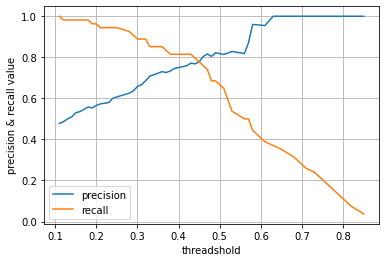

In [ ]:
#-----------------------------------------
# precision_recall_curve : 임계치 확인
#-----------------------------------------
proba = rf_model.predict_proba(X_test)  #.predict(X_test), #proba(1이 나올 확룰)를 얻을 수 있다
print(pred[:10]) #양쪽 [0.97 0.03] 등의 수치를 이용해 0과 1중 더 비중이 높은 곳으로 0,1 값을 출력
print(proba[:10])

precision, recall, th = precision_recall_curve(y_test, proba[:,1])#precision_recall_curve를 그리면 precision, recall, th가 나옴, proba[:,1] : 양의 값만 달라
print(len(precision), len(recall), len(th)) #차트 그리려면 54 54 53 로 len(th)가 하나 부족해서 에러가 발생, 나머지것들에서 하나씩 뺴는 방식 사용
plt.plot(th, precision[:len(th)], label="precision") #차트 그리려면 54 54 53 로 len(th)가 하나 부족해서 에러가 발생, 나머지것들에서 하나씩 뺴는 방식 사용
plt.plot(th, recall[:len(th)]   , label="recall") # label= : 범례
plt.xlabel("threadshold") #x축
plt.ylabel("precision & recall value") #y축
plt.legend()  #plt.legend(["precision","recall"])
plt.grid()
plt.show()
#가장 최적을 내는 임계치를 잡으면 임의로 score을 올릴 수 있음

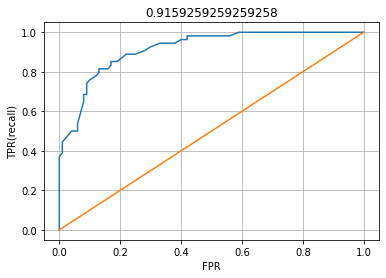

In [ ]:
#--------------------------------------
# 실행은 아래 # precision_recall_curv : 임계치 튜닝을 통한 점수 보정 이 먼저
# roc_auc_curv(양의 비율과 음의 비율을 나타냄)
# th가 1에 가까워지면 정밀도, 0에 가까워지면 재현율이 커짐
#--------------------------------------
fpr, tpr, th = roc_curve(y_test, proba[:,1])
auc = roc_auc_score(y_test, proba[:, 1].reshape(-1, 1))
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1], [0,1], label='th:0.5')#기준선 [0,1] : 0에서 1까지
plt.title(auc) #auc 점수
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.grid()
plt.show()

In [ ]:
#--------------------------------------
# precision_recall_curv : 임계치 튜닝을 통한 점수 보정
#--------------------------------------
#my_th = [.4, .43, .45, .47, .49, .51, .53] #적정수준을 찾고 나머지는 버리면 됨
#아래는 임계치와 재현율의 점수를 보기위해 범위를 넓게 설정, 아래 행 학습 겸 주석 풀고 실행해보기
my_th = [.2, .4, .6, .8, 1.0] #n 올라갈수록 th가 우측으로 이동 (정밀도가 1에 가까워 지는 것), p가 올라갈수록(커질수록) 재현율이 상승함
for th in my_th:#for문 이용해서 회전(임의의 임계치 범위 내)
    print("N : P", th, 1 - th) #N 과 P의 비율을 출력, th : nagative, 1-th : positive,  N : P  약 0.4 0.6

    rf_model.fit(X_train, y_train)
    pred = rf_model.predict(X_test)
    proba = rf_model.predict_proba(X_test)
    GET_MY_SCORE(y_test, pred)#임계치값 바꾸며 점수가 오르는 것을 확인, proba는 못봄

    bn = Binarizer(threshold=th) #threshold=my_th : 임계치를 줌. 0보다 크면 1, 0보다 작으면 0, th: 한개씩 꺼냄, my_th : 0.4, 0.43, 0.45 순서로 진행
    fit_trans = bn.fit_transform(proba[:, 1].reshape(-1, 1)) #bn을 이용해서 fit, trandform을 한번에 함, proba[:,1]: proba값을 주고 proba값은 행렬로 나옴
    #reshape(-1,1)) : 행 렬 (1, 4) 와 같이 나오는걸 (4,1)의 형태로 바꾸기 위함, -1은 있는 값을 다 가져오라는 뜻(다시 metrix로 출력(세로줄 메트릭스))
    #proba는 위의 my_th 기준으로 작을떄는 0, 클때는 1을 출력, 임계치를 올리면 정밀도가 올라감
    auc = roc_auc_score(y_test, proba[:, 1].reshape(-1, 1))
    print(auc) #양의 정수 값 출력
    # N : P 0.4 0.6 일때 F1 0.6667 , N : P 0.43 0.5700000000000001 일때 F1 0.7292, 즉 임계치가 오를때 재현율이 같이 오르고 있고, N : P 0.51 0.49 일떄가 가장 높다
    #positive 가 작아진다는 것은 nagative 학습을 많이 시킨다는것(재현율이 낮아짐)
    #가장 조화로운 값은 N : P 0.53 0.47 일때 F1 0.7677 (정밀도0.8444 재현률0.7037) 가 나옴 (그래프 확인)
#우리 모델은 양성학습이 잘 안 됨

N : P 0.2 0.8
------None-------
정확도0.8312  F1 0.7347=(정밀도0.8182  재현률0.6667) rocauc0.7933
[[92  8]
 [18 36]]
0.927037037037037
N : P 0.4 0.6
------None-------
정확도0.8442  F1 0.7500=(정밀도0.8571  재현률0.6667) rocauc0.8033
[[94  6]
 [18 36]]
0.9204629629629629
N : P 0.6 0.4
------None-------
정확도0.8117  F1 0.6882=(정밀도0.8205  재현률0.5926) rocauc0.7613
[[93  7]
 [22 32]]
0.9056481481481482
N : P 0.8 0.19999999999999996
------None-------
정확도0.8052  F1 0.6809=(정밀도0.8000  재현률0.5926) rocauc0.7563
[[92  8]
 [22 32]]
0.9192592592592592
N : P 1.0 0.0
------None-------
정확도0.8247  F1 0.7097=(정밀도0.8462  재현률0.6111) rocauc0.7756
[[94  6]
 [21 33]]
0.907962962962963


In [ ]:
#N배화 했으나 점수가 좋지 않아 주석처리(문법공부)
from sklearn.model_selection import cross_validate
my_score={"acc":"accuracy", "f1":"f1"} #scoring 여러개 주는 방법
score_list = cross_validate(rf_model, X_scaler, y, scoring=my_score, cv=5, verbose=0) #랜덤포레스트 모델로 연습, verbose=0 : 로그 종류, 위 기능을 한 줄로 바꿀 수 있음
print("score_list----->", score_list)
score_df = pd.DataFrame(score_list)
print(score_df.head())
print("cross_validation 평균 정확도", score_df["test_acc"].mean())
print("cross_validation 평균 f1", score_df["test_f1"].mean())

score_list-----> {'fit_time': array([0.18624997, 0.18296075, 0.17482138, 0.18960524, 0.17294478]), 'score_time': array([0.01102185, 0.01176238, 0.01145339, 0.01070452, 0.01071596]), 'test_acc': array([0.77922078, 0.72727273, 0.74025974, 0.83006536, 0.74509804]), 'test_f1': array([0.67307692, 0.59615385, 0.56521739, 0.73469388, 0.58947368])}
   fit_time  score_time  test_acc   test_f1
0  0.186250    0.011022  0.779221  0.673077
1  0.182961    0.011762  0.727273  0.596154
2  0.174821    0.011453  0.740260  0.565217
3  0.189605    0.010705  0.830065  0.734694
4  0.172945    0.010716  0.745098  0.589474
cross_validation 평균 정확도 0.7643833290892115
cross_validation 평균 f1 0.6317231444593328


In [ ]:
#점수가 안좋게 나와서 주석처리(문법공부)
#-----------------------------------------
# 데이터 적은 경우 --> 데이터 증강 ==> K

#-----------------------------------------
my_score={"acc":"accuracy", "f1":"f1"}
my_hyper_param = { "n_estimators"    :[100],#,300],
                   "max_depth"       :[7,9,11], #바꿔서 튜닝
                   "min_samples_leaf":[3,5,7,9],
                   "random_state" : [121,]}

gcv_model = GridSearchCV(rf_model, param_grid=my_hyper_param, scoring=my_score, refit="f1", cv=5, verbose=0)
#---- 이하 학습 동일 --------------------
# fit : 학습하다
gcv_model.fit(X_train, y_train)
print("best_estimator_", gcv_model.best_estimator_)
print("best_params_",    gcv_model.best_params_)
print("best_score_" ,    gcv_model.best_score_)
#이하가 꺼내는 방법 차이
print("GridSearchCV 평균 정확도 : " , gcv_model.cv_results_["mean_test_acc"].mean())  #mean_test_(본인의score키값), print(gcv_df.info())확인
print("GridSearchCV 평균 F1 : "    , gcv_model.cv_results_["mean_test_f1"].mean())  #f1스코어는 버려야할 수준, .cv_results_ :그리드 서치의 결과, 내장함수

best_estimator_ RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=121,
                       verbose=0, warm_start=False)
best_params_ {'max_depth': 9, 'min_samples_leaf': 5, 'n_estimators': 100, 'random_state': 121}
best_score_ 0.5989799477085107
GridSearchCV 평균 정확도 :  0.7373972633168955
GridSearchCV 평균 F1 :  0.5810624465147757
